# Lyrics Graph

Create a weighted undirected Graph in order to load it in [Gephi](https://gephi.org/) and use its ForcedAtlas algorithm.

Graph:
* Nodes: Songs
* Edge weights: Distance (e.g. euclidean) based on their TF-IDF vectors.

In [114]:
import os
import os.path
import json
from itertools import combinations

In [123]:
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.spatial import distance

from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
import networkx as nx # Graph library

## Load Data

In [125]:
data_path = os.path.join('..','..','04_week','project','data')
json_files = [file for file in os.listdir(data_path) if file.endswith('.json')]

In [126]:
lyrics = []
for json_file in json_files:
    with open(os.path.join(data_path,json_file), encoding='ascii') as file:
        lyrics.extend(json.load(file))

In [127]:
df = pd.DataFrame(data=lyrics)
df.drop(['artist_searched'], axis=1, inplace=True)
df.head()

,artist_found,song_title,lyrics
0,Ray Charles,Georgia on My Mind,"Georgia, Georgia\nThe whole day through (the w..."
1,Ray Charles,Unchain My Heart,"Unchain my heart (unchain my heart), baby let ..."
2,Ray Charles,I Can't Stop Loving You,(I can't stop loving you)\nI've made up my min...
3,Ray Charles,Them That Got,I've gotten down to my last pair of shoes\nCan...
4,Ray Charles,"What'd I Say, Pts. 1-2","Hey mama, don't you treat me wrong\nCome and l..."


In [128]:
df.shape

(1502, 3)

## TF-IDF Transformation

In [129]:
corpus = df['lyrics']

# ignore words with numbers, thanks to https://stackoverflow.com/a/29375664
token_pattern = r"(?u)\b[^\d\W]{2,}\b"

vectorizer = TfidfVectorizer(token_pattern=token_pattern)
X = vectorizer.fit_transform(corpus)

<AxesSubplot:>

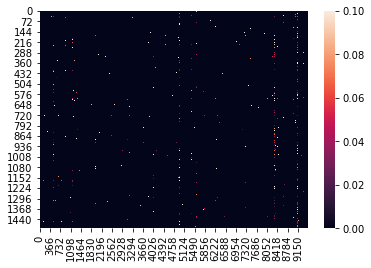

In [40]:
#sns.heatmap(X.todense(), vmax=0.1)

In [130]:
X.shape

(1502, 9491)

In [144]:
def song_vector(song_id, X=X):
    """ Helper function to turn numpy matrix into modern numpy arrays """
    return np.array(X[song_id].todense())[0]

## Graph

### Init

In [145]:
G = nx.Graph()

### Nodes (Songs)

In [146]:
songs_count = X.shape[0]
for song_id in range(songs_count):
    artist = df.iloc[song_id]['artist_found']
    title = df.iloc[song_id]['song_title']
    G.add_node(song_id, label=artist, title=title)

### Edges

In [ ]:
songs_count = X.shape[0]
for a,b in combinations(range(songs_count),2):
    dist = distance.euclidean(song_vector(a), song_vector(b))
    G.add_edge(a, b, weight=dist)

In [ ]:
nx.write_graphml(G, "lyrics.graphml", encoding='utf-8', prettyprint=False)